<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import zipfile
import os
import cv2
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.metrics import jaccard_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
from scipy.io import loadmat

In [93]:
def dice_coefficient(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    intersection = np.sum(y_true * y_pred)
    dice = (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))
    return dice

def get_ground_truth(file_name):
    # Load the ground truth file (.mat) from BSDS
    mat_file = '/content/2092.mat'
    data = loadmat(mat_file)
    header = data['groundTruth']
    gt_image = header[0,0][0][0][0]
    return gt_image

In [94]:
# Path to the partial dataset zip file
zip_file_path = '/content/Berkeley_Segmentation_Dataset_(Partial).zip'
zip_ground_path = '/content/Berkley_Ground_Truth.zip'

# Directory to extract files
extract_dir = '/content/images'
extract_dir_ground = '/content/ground'

# Unzip the images files
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Unzip the images files
with zipfile.ZipFile(zip_ground_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir_ground)


In [90]:
# Create a DataFrame with the specified columns
csv_file = 'segmentation_metrics.csv'
columns = ['dice', 'precision', 'Jaccard', 'F1', 'Recall']
df = pd.DataFrame(columns=columns)

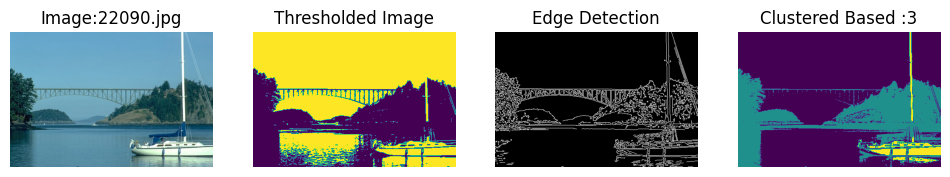

KeyboardInterrupt: 

In [6]:
# Loop through the directory , read files , and perform three different image segmentation techniques
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        file_path = os.path.join(root, file)
        image = io.imread(file_path)

        # convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # calculate and apply adaptive threshold for every image
        channel_threshold = 0
        channel_threshold = np.mean(gray_image)
        _, thresholded_image = cv2.threshold(gray_image,channel_threshold, 255, cv2.THRESH_BINARY)

        # Apply Canny edge detection
        edges = cv2.Canny((image * 255).astype('uint8'), 100, 200)

        # Clustering-based segmentation ( Mean Shift)
        # Reshape the image to a 2D array of pixels
        flat_image = image.reshape((-1, 3))

        # Estimate the bandwidth of the data
        bandwidth = estimate_bandwidth(flat_image, quantile=0.2, n_samples=500)

        # Perform Mean Shift clustering
        mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        mean_shift.fit(flat_image)
        labels = mean_shift.labels_

        # Number of clusters
        num_clusters = len(np.unique(labels))

        # Reshape the labels to the original image shape
        segmented_image = labels.reshape(image.shape[:2])

        # Display the images
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 4, 1)
        plt.title('Image:'+str(file))
        plt.imshow(image, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 4, 2)
        plt.title('Thresholded Image')
        plt.imshow(thresholded_image, cmap='viridis')
        plt.axis('off')

        plt.subplot(1, 4, 3)
        plt.title('Edge Detection')
        plt.imshow(edges, cmap='gray')
        plt.axis('off')

        plt.subplot(1, 4, 4)
        plt.title('Clustered Based :' + str(num_clusters))
        plt.imshow(segmented_image, cmap='viridis')
        plt.axis('off')
        plt.show()

        # write the resuls
        Get_

        jaccard = jaccard_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f_measure = f1_score(y_true, y_pred)
        dice = dice_coefficient(y_true, y_pred)


In [69]:
import numpy as np
import cv2

def dice_coefficient(gt_image, seg_image):
    intersection = np.logical_and(gt_image, seg_image).sum()
    union = gt_image.sum() + seg_image.sum()
    dice = (2. * intersection) / union
    return dice

def jaccard_index(gt_image, seg_image):
    intersection = np.logical_and(gt_image, seg_image).sum()
    union = np.logical_or(gt_image, seg_image).sum()
    jaccard = intersection / union
    return jaccard

def precision_recall(gt_image, seg_image):
    tp = np.logical_and(gt_image, seg_image).sum()
    fp = np.logical_and(np.logical_not(gt_image), seg_image).sum()
    fn = np.logical_and(gt_image, np.logical_not(seg_image)).sum()

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    return precision, recall, 2 * precision * recall / (precision + recall)

# Example usage:
# Load your ground truth and segmented images
#gt_image = cv2.imread('ground_truth.png', cv2.IMREAD_GRAYSCALE)
#seg_image = cv2.imread('segmented_output.png', cv2.IMREAD_GRAYSCALE)

# Binarize images if necessary (convert to binary masks)
gt_image = (gt_image > 0).astype(np.uint8)
seg_image = (seg_image > 0).astype(np.uint8)

# Calculate metrics
dice = dice_coefficient(gt_image, seg_image)
jaccard = jaccard_index(gt_image, seg_image)
precision, recall, f_measure = precision_recall(gt_image, seg_image)

# Print results
print(f'Dice Coefficient: {dice:.4f}')
print(f'Jaccard Index: {jaccard:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F-measure: {f_measure:.4f}')


Dice Coefficient: 0.4695
Jaccard Index: 0.3068
Precision: 1.0000
Recall: 0.3068
F-measure: 0.4695


In [4]:
from scipy.io import loadmat

# Load the ground truth file (.mat) from BSDS
mat_file = '/content/2092.mat'
data = loadmat(mat_file)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/2092.mat'

dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])
<class 'numpy.ndarray'>
[array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
                [ 1,  1,  1, ...,  1,  1,  1],
                [ 1,  1,  1, ...,  1,  1,  1],
                ...,
                [15, 15, 15, ..., 15, 15, 15],
                [15, 15, 15, ..., 15, 15, 15],
                [15, 15, 15, ..., 15, 15, 15]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))                                       ]],
       dtype=[('Segmentation', 'O'), ('Boundaries', 'O')])
 array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
                [ 1,  1,  1, ...,  1,  1,  1],
                [ 1,  1,  1, ...,  1,  1,  1],
                ...,
                [10, 10, 10, ..., 10, 10, 10],
 

TypeError: Image data of dtype object cannot be converted to float

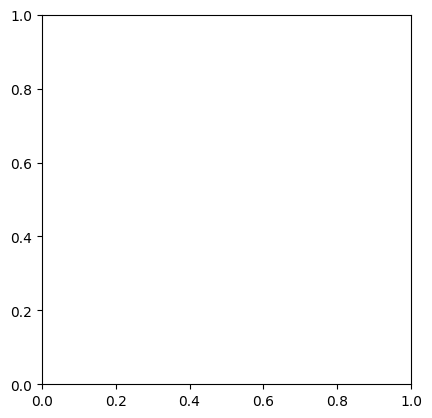

In [106]:
from scipy.io import loadmat

# Load the ground truth file (.mat) from BSDS
mat_file = '/content/2092.mat'
data = loadmat(mat_file)

# Explore the dictionary
print(data.keys())  # This will print all the keys in the dictionary

# Access a specific item by key
# Assuming 'groundTruth' is a key in the dictionary
ground_truth_data = data['groundTruth']

# Explore the contents of ground_truth_data
print(type(ground_truth_data))  # Check the type of the value

# If it's an array or list, you may want to iterate over it
for item in ground_truth_data:
    print(item)

# Access specific fields if it's a structured array or nested dictionary
# This depends on the structure of the .mat file
if isinstance(ground_truth_data, np.ndarray) and ground_truth_data.dtype.names:
    for name in ground_truth_data.dtype.names:
        print(name, ground_truth_data[name])

# Example: Accessing a specific ground truth mask
# Adjust according to the actual structure of your data
if isinstance(ground_truth_data, np.ndarray) and ground_truth_data.size > 0:
    mask = ground_truth_data[0] # Example field, adjust as needed
    print(mask)

# Further processing or visualization
import matplotlib.pyplot as plt

# Example: Displaying a ground truth mask
plt.imshow(mask, cmap='gray')
plt.title('Ground Truth Segmentation Mask')
plt.axis('off')
plt.show()


dict_keys(['__header__', '__version__', '__globals__', 'groundTruth'])


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
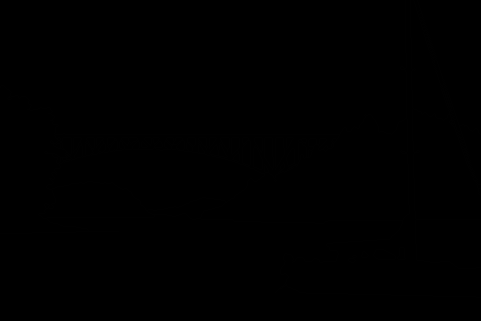

In [60]:
from scipy.io import loadmat

# Load the ground truth file (.mat) from BSDS
mat_file = '/content/22090.mat'
data = loadmat(mat_file)

# Explore the dictionary
print(data.keys())

header = data['groundTruth']
header[0][0][0][0][1]

In [8]:
pp = data['groundTruth']

In [149]:
len(pp[0][0][0][0][0])

321

In [92]:
def get_ground_truth(file_path):
  # Load the ground truth file (.mat) from BSDS
  mat_file = '/content/2092.mat'
  data = loadmat(mat_file)
  header = data['groundTruth']
  gt_image = header[0,0][0][0][0]
  return gt_image

In [61]:
header = data['groundTruth']
type(header) #.keys()
header.shape

(1, 6)

In [36]:
header[0,0] , header[0,1],header[0,2],header[0,3]

(array([[(array([[ 1,  1,  1, ...,  2,  2,  2],
                [ 1,  1,  1, ...,  2,  2,  2],
                [ 1,  1,  1, ...,  2,  2,  2],
                ...,
                [12, 12, 12, ..., 22, 22, 22],
                [12, 12, 12, ..., 22, 22, 22],
                [12, 12, 12, ..., 22, 22, 22]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))                                       ]],
       dtype=[('Segmentation', 'O'), ('Boundaries', 'O')]),
 array([[(array([[ 1,  1,  1, ...,  1,  1,  1],
                [ 1,  1,  1, ...,  1,  1,  1],
                [ 1,  1,  1, ...,  1,  1,  1],
                ...,
                [38, 38, 38, ..., 33, 33, 33],
                [38, 38, 38, ..., 33, 33, 33],
                [38, 38, 38, ..., 33, 33, 33]], 

In [49]:
type(header[0,0]) ,header[0,0][0].shape , header[0,0][0][0][0] , header[0,0]

(numpy.ndarray,
 (1,),
 array([[ 1,  1,  1, ...,  2,  2,  2],
        [ 1,  1,  1, ...,  2,  2,  2],
        [ 1,  1,  1, ...,  2,  2,  2],
        ...,
        [12, 12, 12, ..., 22, 22, 22],
        [12, 12, 12, ..., 22, 22, 22],
        [12, 12, 12, ..., 22, 22, 22]], dtype=uint16),
 array([[(array([[ 1,  1,  1, ...,  2,  2,  2],
                [ 1,  1,  1, ...,  2,  2,  2],
                [ 1,  1,  1, ...,  2,  2,  2],
                ...,
                [12, 12, 12, ..., 22, 22, 22],
                [12, 12, 12, ..., 22, 22, 22],
                [12, 12, 12, ..., 22, 22, 22]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))                                       ]],
       dtype=[('Segmentation', 'O'), ('Boundaries', 'O')]))

In [50]:
(header[0,0][0][0][0]).shape

(321, 481)

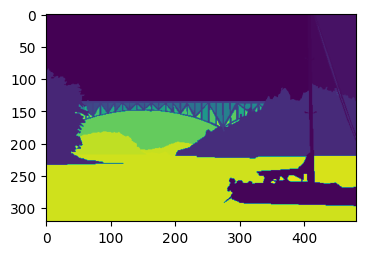

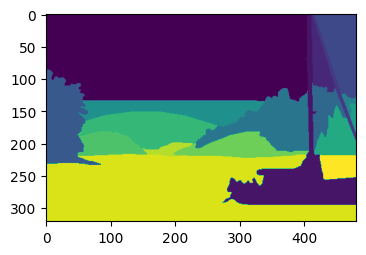

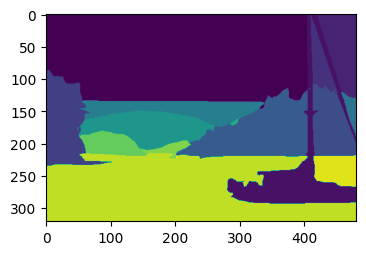

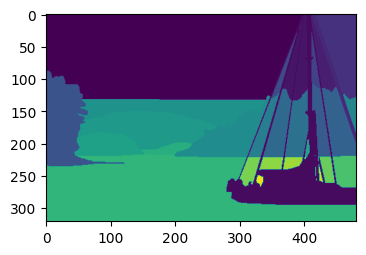

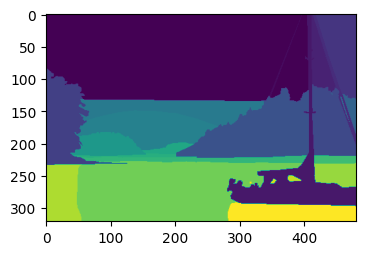

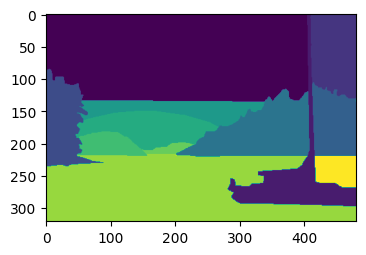

In [64]:
for i in range(6):
  plt.figure(i,figsize=(4,3))
  plt.imshow(header[0,i][0][0][0])

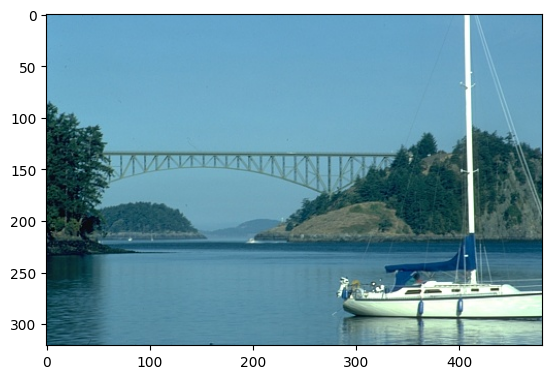

In [59]:
# Directory to extract files
extract_dir = '/content/22090.jpg'
image = io.imread(extract_dir)
plt.imshow(image)

array([[ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       [ 1,  1,  1, ...,  5,  5,  5],
       ...,
       [80, 80, 80, ..., 80, 80, 80],
       [80, 80, 80, ..., 80, 80, 80],
       [80, 80, 80, ..., 80, 80, 80]], dtype=uint16)

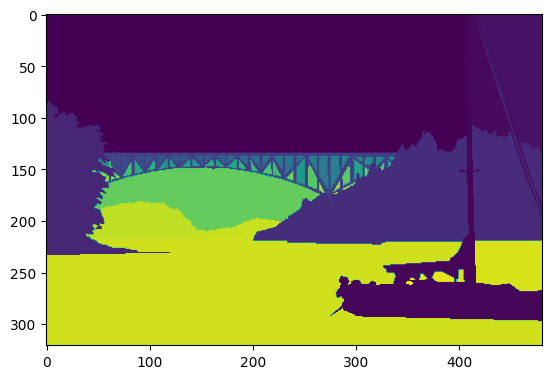

In [83]:
gt_image = header[0,0][0][0][0]
plt.imshow(gt_image)
gt_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

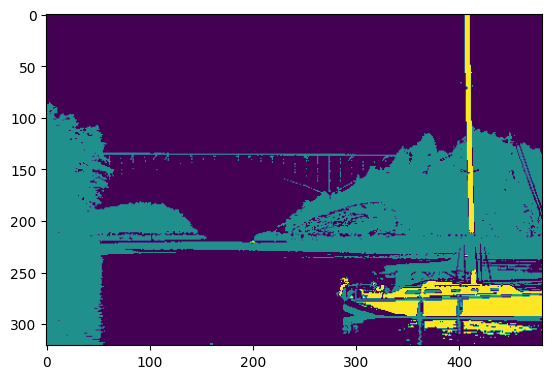

In [84]:
seg_image = segmented_image
plt.imshow(seg_image)
seg_image